# Imports

In [1]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Softmax
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import random

from matplotlib import animation, rc

%matplotlib inline

rc('animation', html='html5')

# Plotting setup

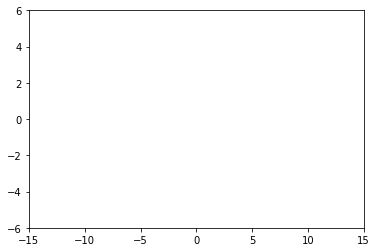

In [ ]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots();

ax.set_xlim([-15,15])
ax.set_ylim([-6,6])
line1, = ax.plot([], [], '-')
line2 = ax.scatter([], [])

In [ ]:
# Helper function to visualize decision boundaries
def visualize(model, data, labels, w, b, title=None, colors=['r','b','g'], background_colors=['#FF6969', '#6B94DC', '#6DDC6B']):
    nx,ny = 500,500
    xx,yy = np.meshgrid(np.linspace(-15, 15, nx), np.linspace(-6, 6, ny))
    x_grid = np.hstack((xx.flatten().reshape(nx*ny,1), yy.flatten().reshape(nx*ny,1)))

    y_pred = model.predict(x_grid, verbose=False)
    g = np.argmax(y_pred, axis=1)
    c = [background_colors[v] for v in g]
    plt.scatter(xx, yy, c=c, s=40, marker='s', edgecolor='none')#, cmap=plt.cm.Spectral)
    plt.scatter([x[0] for x in data], [x[1] for x in data], c=[colors[l] for l in labels], s=40)
    plt.xlim([-15,15])
    plt.ylim([-6,6])
    if title:
        plt.title(title)
    plt.show()

# Data Setup
Unlike the previous toy example set with 4 instances, we will create a bigger (but still toy) set with 100 data points

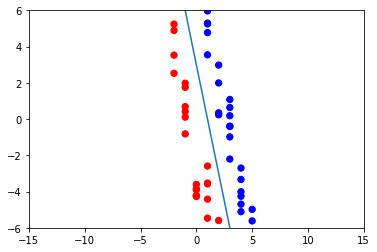

In [ ]:
num_classes = 2
num_features = 2
num_examples = 100

colors = ['r','b','g']
data = []
labels = []
# Generate random data
for idx in range(num_examples):
    # Randomly decide if we want a positive or negative example
    if (random.random() > 0.5):
        label = 0
    else:
        label = 1

    rand_x = random.randint(-5,5)
    rand_decision = (random.random() + 0.5) * 5 * (label*2-1)
    y = rand_decision + -3 * rand_x + 3
    data.append([rand_x, y])
    labels.append(label)

plt.xlim([-15,15])
plt.ylim([-6,6])
plt.scatter([x[0] for x in data], [x[1] for x in data], c=[colors[l] for l in labels], s=40)
x_line = np.linspace(-15,15)
y_line = -3.0 * x_line + 3
plt.plot(x_line, y_line)

# Data preparation for learning
All frameworks expect data in a certain _format_. Keras expects its input to be in *Numpy* matrices.

We usually use `X` to denote the data, and `y` to denote labels. 
`X` is a matrix of size `num_examples x num_features`, in this case, `100 x 2`.
`y` is a vector of size `num_examples`, one label per example. In this case, `100`.

In [ ]:
X = np.array(data)
y = np.array(labels)

print("X shape:",X.shape)
print("y shape:",y.shape)

X shape: (100, 2)
y shape: (100,)


Even though we now have `y` with 100 labels (`0` or `1`), recall that in binary classification, we eventually compare probability distributions using Softmax and CrossEntropy. Hence, we need to convert our `y` into matrix of probability distributions.

Essentially, we will me doing the following mapping:
Class `0` => `[1.0, 0.0]`
Class `1` => `[0.0, 1.0]`

Keras has a built in function, `to_categorical` to do this conversion for us

In [ ]:
print("Old y sample:")
print(y[:10])

y_probs = to_categorical(y, num_classes=2) # Need to convert to a probability distribution - need to have a column for each class
print("New y sample:")
print(y_probs[:10, :]) # The relevant column will be 1

Old y sample:
[1 1 1 0 0 0 0 1 1 0]
New y sample:
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


# Model definition

In [ ]:
model = Sequential()
model.add(Dense(2, input_shape=(2,)))
model.add(Softmax())

sgd_optimizer = optimizers.SGD(lr=0.01)
model.compile(loss="categorical_crossentropy",
              optimizer=sgd_optimizer,
              metrics=['acc'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
softmax_1 (Softmax)          (None, 2)                 0         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


# Learning

In [ ]:
# Visualize initial decision boundary
w, b = model.layers[0].get_weights()
visualize(model, data, labels, w, b, title="Before training")

for epoch in range(100):
    # Perform one step over the entire dataset
    loss_history = model.fit(X, y_probs, epochs=1, verbose=False)
    
    # Get predictions (value of the objective function, f)
    y_pred = model.predict(X, verbose=False)
    
    # See how well our model is doing
    correct_preds = (np.argmax(y_pred, axis=1) == y) # Whichever column is greater is the predicted class
    num_correct = np.sum(correct_preds)
    acc = num_correct / 100.0
    loss = loss_history.history['loss'][-1]
    
    if epoch % 10 == 0:
        print("Epoch %d: %0.2f (acc) %0.2f (loss)"%(epoch+1, acc, loss))

# Visualize learned decision boundary
w, b = model.layers[0].get_weights()
visualize(model, data, labels, w, b, title="After training")